In [26]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn


In [10]:
df_test = pd.read_csv("../data/test/test.csv")
df_train = pd.read_csv("../data/train/train.csv")
dff = pd.read_csv("../data/test.csv")

In [12]:
df_train.head()

,doc_id,titre,type,difficulte,cout,ingredients,recette
0,recette_19924.xml,Bûche de Noël pistachée,Dessert,Moyennement difficile,Moyen,- Pour le biscuit : - 4 œufs + 2 jaunes - 110 ...,Préchauffez le four à (210°C). Étalez du papie...
1,recette_25149.xml,Tarte aux pommes au fromage blanc,Dessert,Facile,Moyen,- 1 rouleau de pâte feuilletée ou brisée - 3 p...,"Pelez et coupez les pommes en quartiers, retir..."
2,recette_40068.xml,Salade de chèvre chaud au miel et pesto,Entrée,Très facile,Bon marché,- 4 chèvres frais - 4 poignées de roquette (ou...,Faire une couronne avec la roquette dans chaqu...
3,recette_62942.xml,Pommes de terre farcies aux escargots,Entrée,Très facile,Moyen,- 2 très grosses pommes de terre - 4 douzaines...,Faire cuire les pommes de terre à l'eau mais p...
4,recette_12714.xml,Tarte au fromage et à l'abricot,Dessert,Facile,Bon marché,- Pour la pâte : - 200 g de farine - 1 oeuf - ...,Coupez en petit dés le beurre que vous mélange...


In [17]:
X_train = df_train['recette']
X_test = df_test['recette']

Y_train = df_train['type']
Y_test = df_test['type']

dff_X = dff["recette"]
dff_Y = dff["type"]

In [20]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))


                precision    recall  f1-score   support

       Dessert       0.89      0.96      0.92       753
        Entrée       0.67      0.47      0.55       582
Plat principal       0.78      0.86      0.82      1161

      accuracy                           0.80      2496
     macro avg       0.78      0.76      0.76      2496
  weighted avg       0.79      0.80      0.79      2496



In [23]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.97      0.95      0.96       753
        Entrée       0.94      0.06      0.11       582
Plat principal       0.67      1.00      0.80      1161

      accuracy                           0.76      2496
     macro avg       0.86      0.67      0.63      2496
  weighted avg       0.83      0.76      0.69      2496



In [24]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.96      0.98      0.97       753
        Entrée       0.83      0.31      0.45       582
Plat principal       0.74      0.96      0.83      1161

      accuracy                           0.81      2496
     macro avg       0.84      0.75      0.75      2496
  weighted avg       0.83      0.81      0.79      2496



In [28]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 741,    5,    7],
       [  13,  181,  388],
       [  18,   31, 1112]], dtype=int64)

Text(95.72222222222221, 0.5, 'Vérité')

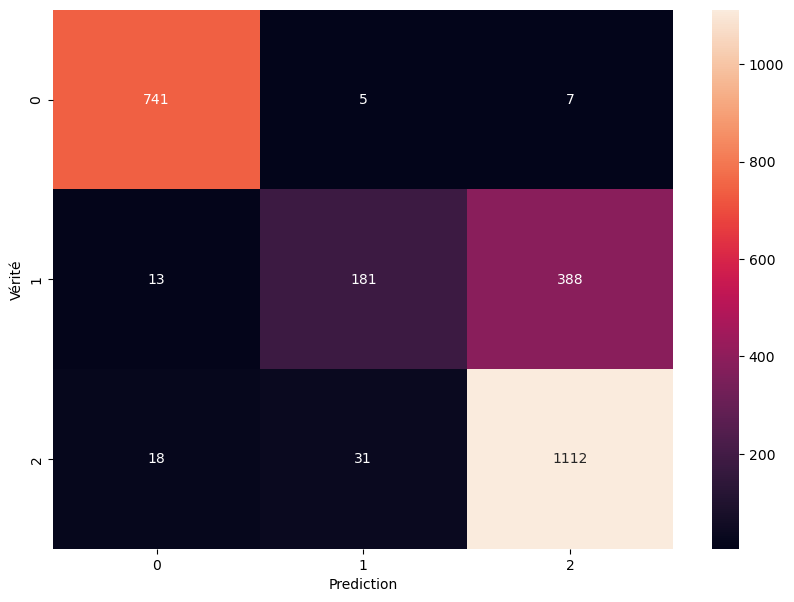

In [29]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Vérité')